In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

sns.set_style("ticks")
# sns.set_style("white")
# sns.set_style("whitegrid")

In [2]:
photoz_table = pd.read_csv("Fields-DR3/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'odds', 'PROB_GAL'])

specz_table = pd.read_csv("hydra_specz.csv", usecols=['RA_1', 'DEC_1', 'z', 'PROB_GAL'])

In [3]:
ra_pz = photoz_table["RA"]
dec_pz = photoz_table["DEC"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]

ra_sz = specz_table["RA_1"]
dec_sz = specz_table["DEC_1"]
z = specz_table["z"]
probgal_sz = specz_table["PROB_GAL"]

In [4]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances_pz = dist(ra_pz, dec_pz)
distances_sz = dist(ra_sz, dec_sz)

In [11]:
for odds_min in [0.7, 0.8]:
    t = []
    for photoz_max in [0.03, 0.04, 0.05, 0.06]:
        
        mask_pz = (distances_pz < 5*radius) & (zml > 0.0) & (zml < photoz_max) & (odds > odds_min) & (prob_gal > 0.8)
        mask_sz = (distances_sz < 5*radius) & (z > 0.0) & (z < photoz_max) & (odds > odds_min) & (probgal_sz > 0.8)
        
        numb_of_galaxies = np.sum(mask_pz)
        numb_with_specz = np.sum(mask_sz)
        
        t.append(
        {
            'Photo-z_max': photoz_max,
            'Number of galaxies': numb_of_galaxies,
            'Galaxies with spec-z': numb_with_specz
            
        }
    )

    if odds_min == 0.7: t07 = pd.DataFrame(t)
    if odds_min == 0.8: t08 = pd.DataFrame(t)

In [14]:
t07

,Photo-z_max,Number of galaxies,Galaxies with spec-z
0,0.03,1663,19
1,0.04,2508,24
2,0.05,3558,28
3,0.06,5150,29


In [15]:
t08

,Photo-z_max,Number of galaxies,Galaxies with spec-z
0,0.03,1410,15
1,0.04,2028,17
2,0.05,2776,17
3,0.06,4003,18


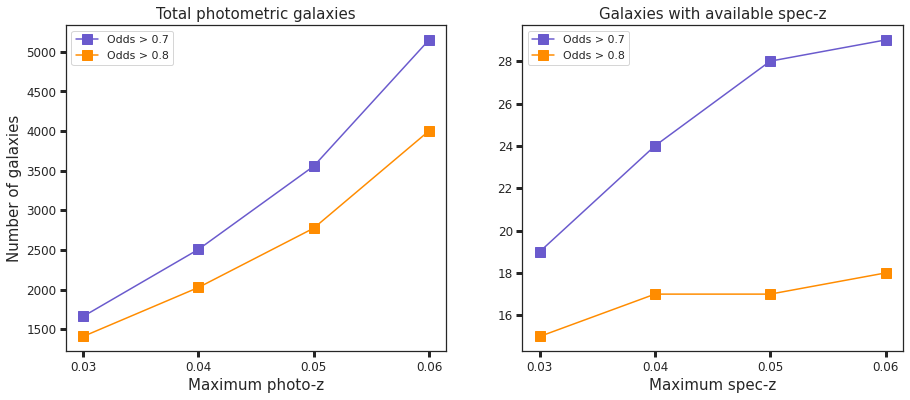

In [50]:
fontsize = 15
labelsize = 12

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(t07["Photo-z_max"], t07["Number of galaxies"], marker='s', markersize=10.0, color='slateblue', label="Odds > 0.7")
ax1.plot(t08["Photo-z_max"], t08["Number of galaxies"], marker='s', markersize=10.0, color='darkorange', label="Odds > 0.8")
ax1.set_xlabel("Maximum photo-z", fontsize=fontsize)
ax1.set_ylabel("Number of galaxies", fontsize=fontsize)
ax1.set_xticks(t07["Photo-z_max"])
ax1.set_title("Total photometric galaxies", fontsize=fontsize)
ax1.legend()


ax2.plot(t07["Photo-z_max"], t07["Galaxies with spec-z"], marker='s', markersize=10.0, color='slateblue', label="Odds > 0.7")
ax2.plot(t08["Photo-z_max"], t08["Galaxies with spec-z"], marker='s', markersize=10.0, color='darkorange', label="Odds > 0.8")
ax2.set_xlabel("Maximum spec-z", fontsize=fontsize)
# ax2.set_ylabel("Number of galaxies", fontsize=fontsize)
ax2.set_title("Galaxies with available spec-z", fontsize=fontsize)
ax2.set_xticks(t07["Photo-z_max"])
ax2.legend()

for ax in [ax1, ax2]:
    ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
    ax.xaxis.set_tick_params(labelsize=labelsize, width=3)

# plt.savefig("../Figures/photoz-max_odds_table.pdf", format='pdf')